# GISTEMP 5.0

## Intro to GISTEMP:
Surface air temperature change is a primary measure of global climate change. The GISTEMP project started in the late 1970s to provide an estimate of the changing global surface air temperature which could be compared with the estimates obtained from climate models simulating the effect of changes in atmospheric carbon dioxide, volcanic aerosols, and solar irradiance.The continuing analysis updates global temperature change from the late 1800s to the present. The last major update of the GISTEMP codebase occurred in 2011 to convert the original code from Fortran to Python. Since then, many of the relevant libraries and development standards have evolved.

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd

In [13]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"

combined_temp_ds = xr.open_dataset(file)

In [15]:
combined_temp_ds

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1725, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-09-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-10-11 11:54:46 by SBBX_to_nc 2.0 - ILAND=1200,...

In [16]:
ds_latest_month = combined_temp_ds.sel(time = combined_temp_ds.time[-1])
ds_latest_month

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
    time         datetime64[ns] 2023-09-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (nv) datetime64[ns] ...
    tempanomaly  (lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-10-11 11:54:46 by SBBX_to_nc 2.0 - ILAND=1200,...

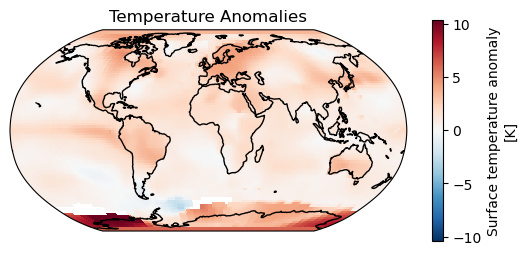

In [51]:
fig, ax = plt.subplots(subplot_kw = {'projection': ccrs.Robinson()})
ds_latest_month.tempanomaly.plot(transform = ccrs.PlateCarree(), cbar_kwargs={'shrink':0.6})

ax.coastlines()

ax.set_title('Temperature Anomalies')

plt.show()

In [29]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as pl

In [30]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

In [53]:
# Extract the temperature data for a specific location 
temperature_data = combined_temp_ds['tempanomaly'].sel(lat=0, lon=0, method='nearest')

# Resample the data to a seasonal frequency, with seasons starting in December
temperature_data_resampled = temperature_data.resample(time='Q-DEC').mean()

# Convert the resampled temperature data to a Pandas DataFrame
temperature_df = temperature_data_resampled.to_dataframe(name='Temperature Anomaly')

# Reset the index to make 'time' a column
temperature_df.reset_index(inplace=True)

In [54]:
# Extract the season and year from the 'time' column
temperature_df['Season'] = temperature_df['time'].dt.strftime('%B')
temperature_df['Year'] = temperature_df['time'].dt.year

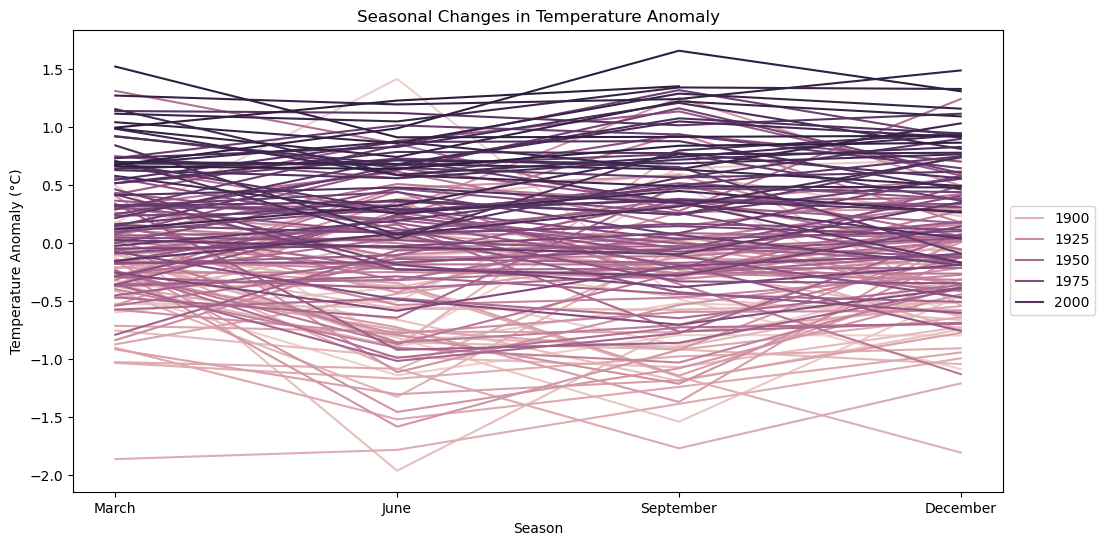

In [70]:
# Plot the seasonal changes using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Season', y='Temperature Anomaly', hue='Year', data=temperature_df)
plt.title('Seasonal Changes in Temperature Anomaly')
plt.xlabel('Season')
plt.ylabel('Temperature Anomaly (°C)')

# Place legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [37]:
import xarray as xr
import matplotlib.pyplot as plt

In [38]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

In [39]:
# Extract the global annual mean surface air temperature
global_mean_temp = combined_temp_ds['tempanomaly'].mean(dim=['lat', 'lon'])

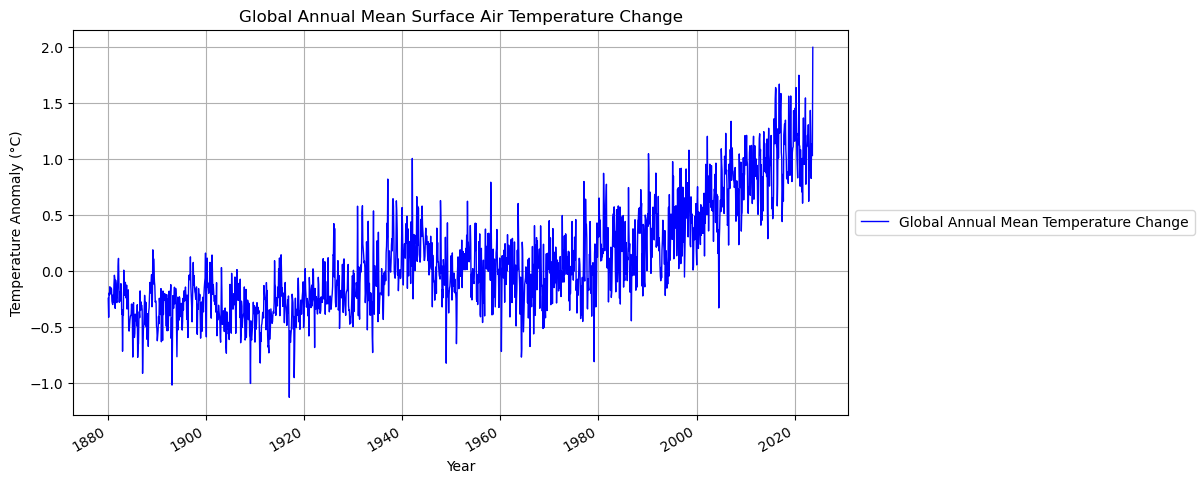

In [60]:
# Plot the global annual mean temperature change with legend to the right
plt.figure(figsize=(10, 5))
global_mean_temp.plot(label='Global Annual Mean Temperature Change', color='b', linewidth=1)
plt.title('Global Annual Mean Surface Air Temperature Change')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')

# Place legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.show()

In [43]:
import xarray as xr
import matplotlib.pyplot as plt

In [44]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

In [45]:
# Display available variables in the dataset
print(combined_temp_ds)

# Extract annual mean temperature over three latitude bands
latitude_bands = [
    combined_temp_ds['tempanomaly'].sel(lat=slice(-90, -30)).mean(dim=['lat', 'lon']),
    combined_temp_ds['tempanomaly'].sel(lat=slice(-30, 30)).mean(dim=['lat', 'lon']),
    combined_temp_ds['tempanomaly'].sel(lat=slice(30, 90)).mean(dim=['lat', 'lon']),
]

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1725, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-09-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-10-11 11:54:46 by SBBX_to_nc 2.0 - ILAND=1200,...


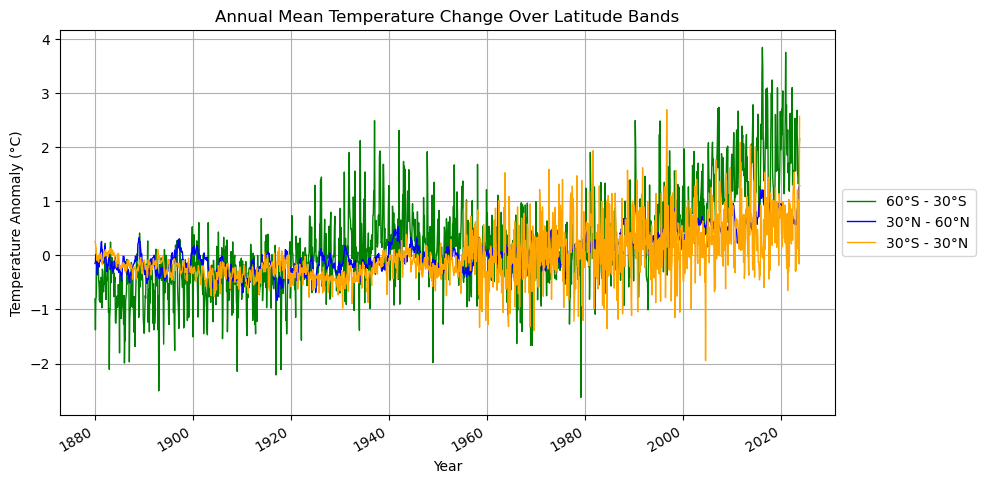

In [69]:
# Plot annual mean temperature change over three latitude bands
plt.figure(figsize=(10, 5))

# Plot green band
latitude_bands[2].plot(label='60°S - 30°S', linewidth=1, color='green')

# Plot blue band
latitude_bands[1].plot(label='30°N - 60°N', linewidth=1, color='blue')

# Plot orange band
latitude_bands[0].plot(label='30°S - 30°N', linewidth=1, color='orange')

plt.title('Annual Mean Temperature Change Over Latitude Bands')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')

# Place legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

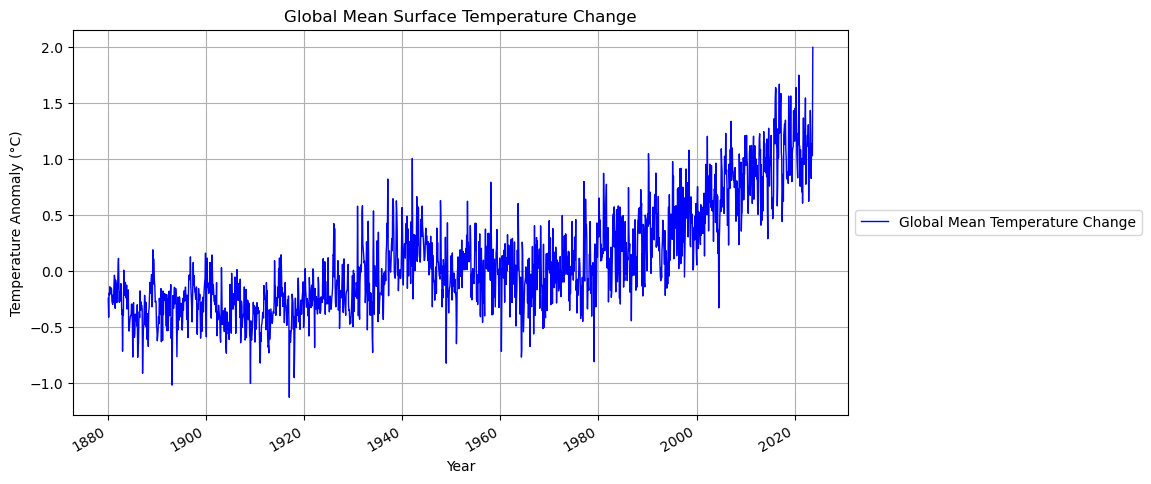

In [75]:
import matplotlib.pyplot as plt
import xarray as xr

In [ ]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract global mean temperature
global_mean_temp = combined_temp_ds['tempanomaly'].mean(dim=['lat', 'lon'])

In [ ]:
# Plot the global mean temperature change
plt.figure(figsize=(10, 5))
global_mean_temp.plot(label='Global Mean Temperature Change', color='b', linewidth=1)
plt.title('Global Mean Surface Temperature Change')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')

# Place legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import xarray as xr

In [ ]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract temperature data for the United States (replace lat and lon with desired coordinates)
us_temperature_data = combined_temp_ds['tempanomaly'].sel(lat=slice(24, 49), lon=slice(-125, -66))

# Calculate the five-year mean temperature anomaly for the United States
us_five_year_mean_temp = us_temperature_data.rolling(time=60, center=True).mean()

In [ ]:
# Set up the animation
fig, ax = plt.subplots()
cax = ax.pcolormesh(us_five_year_mean_temp.lon, us_five_year_mean_temp.lat, us_five_year_mean_temp.isel(time=0), shading='auto')
fig.colorbar(cax, label='Temperature Anomaly (°C)')

def update(frame):
    cax.set_array(us_five_year_mean_temp.isel(time=frame).values.ravel())

ani = animation.FuncAnimation(fig, update, frames=len(us_five_year_mean_temp.time), repeat=False)

In [ ]:
# Save the animation to an HTML file
ani.save('us_temperature_animation.html', writer='html')
http://localhost:8888/notebooks/Downloads/GISTEMP_rewrite-main/GISTEMP%20Visualizations.ipynb#
# Display the saved HTML file
HTML('us_temperature_animation.html')

In [94]:
import matplotlib.pyplot as plt
import xarray as xr

In [95]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Resample the data to a seasonal frequency
temp_seasonal = combined_temp_ds['tempanomaly'].resample(time='QS-DEC').mean()

# Separate data for each season
winter_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'DJF')
spring_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'MAM')
summer_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'JJA')
fall_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'SON')

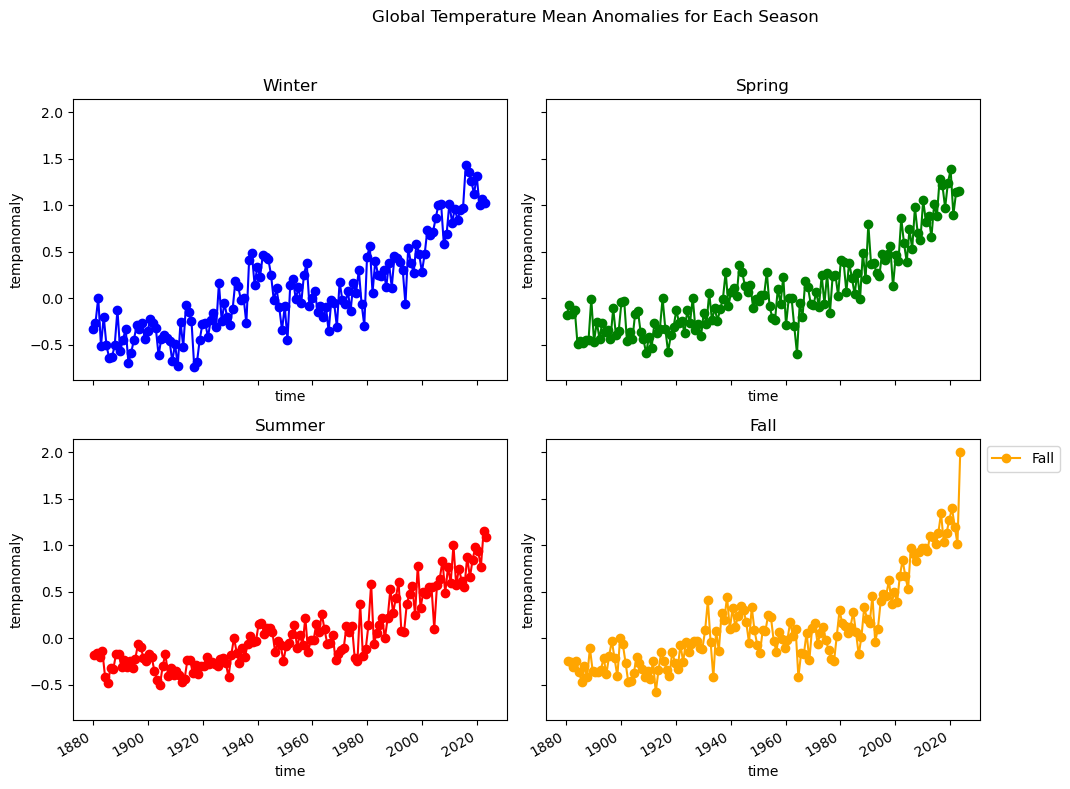

In [96]:
# Plot each season as a line graph with different colors and line thickness
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle('Global Temperature Mean Anomalies for Each Season')

# Winter
winter_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[0, 0], marker='o', label='Winter', color='blue', linewidth=1.5)
axes[0, 0].set_title('Winter')

# Spring
spring_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[0, 1], marker='o', label='Spring', color='green', linewidth=1.5)
axes[0, 1].set_title('Spring')

# Summer
summer_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[1, 0], marker='o', label='Summer', color='red', linewidth=1.5)
axes[1, 0].set_title('Summer')

# Fall
fall_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[1, 1], marker='o', label='Fall', color='orange', linewidth=1.5)
axes[1, 1].set_title('Fall')

# Add a single legend outside the subplots
axes.flatten()[-1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

In [97]:
import matplotlib.pyplot as plt
import xarray as xr

In [98]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Resample the data to a seasonal frequency
temp_seasonal = combined_temp_ds['tempanomaly'].resample(time='QS-DEC').mean()

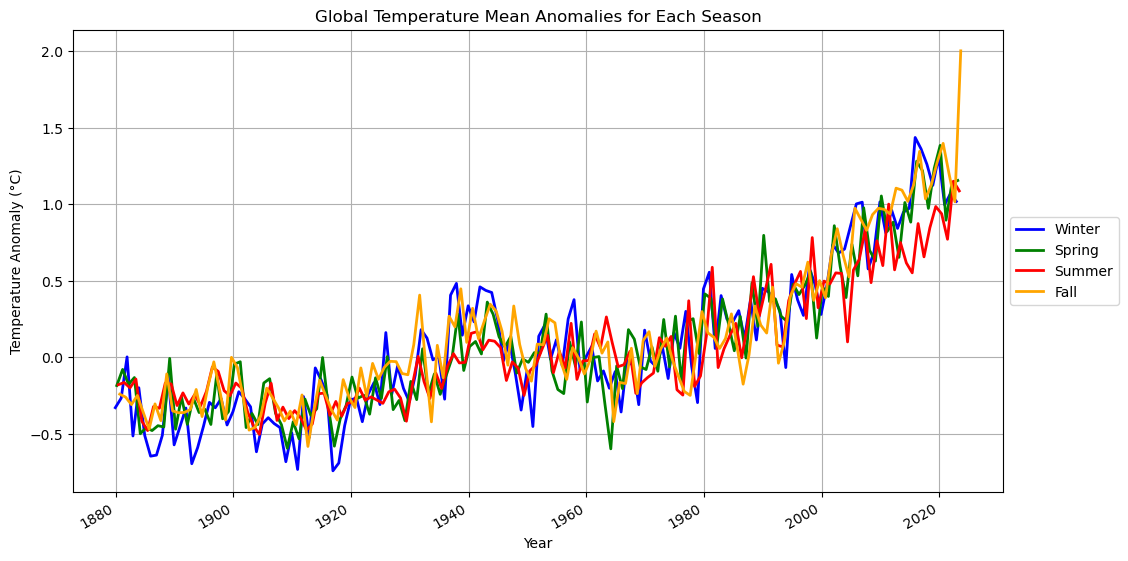

In [101]:
# Plot each season as a line graph with different colors and line thickness
plt.figure(figsize=(12, 6))

# Winter
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'DJF').mean(dim=['lat', 'lon']).plot.line(label='Winter', color='blue', linewidth=2)

# Spring
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'MAM').mean(dim=['lat', 'lon']).plot.line(label='Spring', color='green', linewidth=2)

# Summer
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'JJA').mean(dim=['lat', 'lon']).plot.line(label='Summer', color='red', linewidth=2)

# Fall
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'SON').mean(dim=['lat', 'lon']).plot.line(label='Fall', color='orange', linewidth=2)

plt.title('Global Temperature Mean Anomalies for Each Season')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()